In [1]:
print("Artificial Intelligence")

Artificial Intelligence


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

### 1.Load the data 


In [3]:
housing = pd.read_csv('datasets/housing.csv')

In [4]:
# quick description of data
housing.info()
# object is anything that have 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


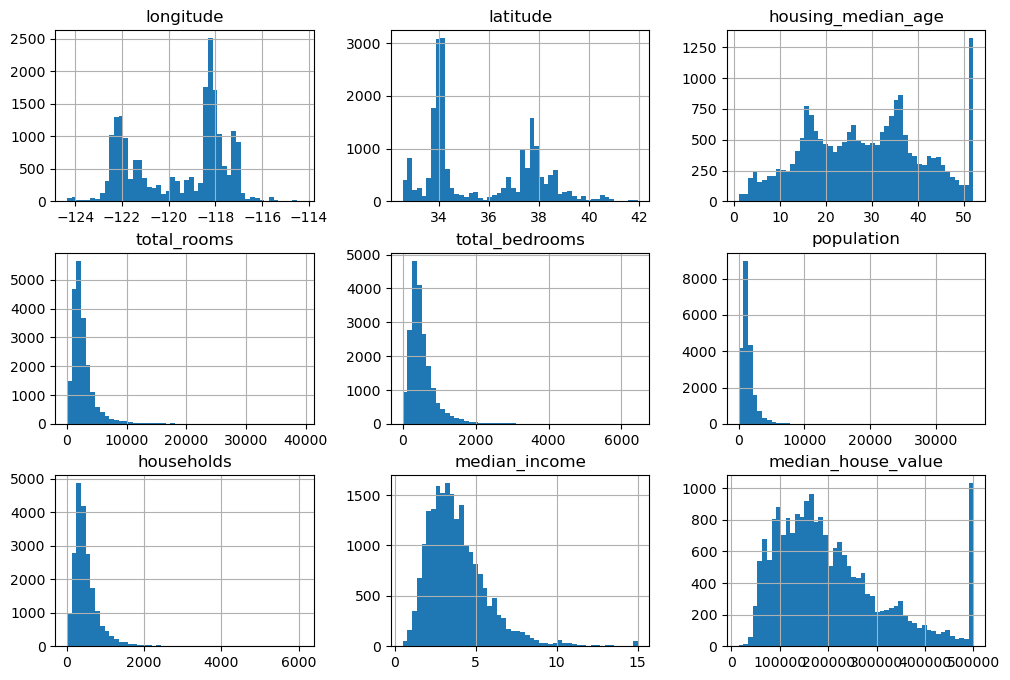

In [6]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [7]:
# spitting the 20% data for test purpose
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [8]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

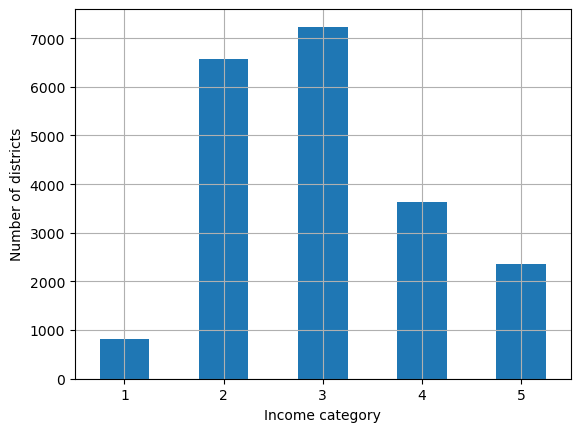

In [9]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

### 2.Explore and Visualize the data 

In [10]:
housing = train_set.copy()

In [11]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,71600.0,NEAR BAY
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,379300.0,<1H OCEAN
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,104200.0,INLAND
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,84700.0,INLAND


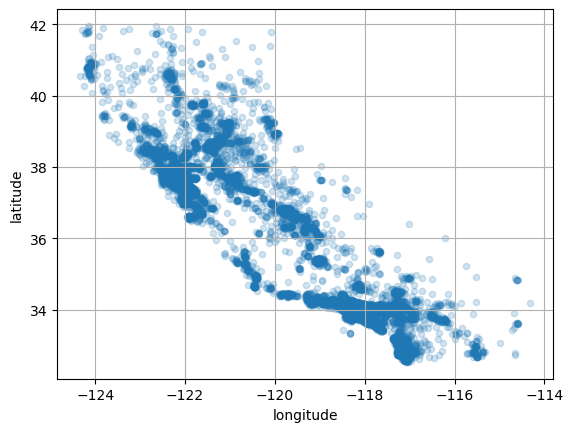

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude",grid=True,alpha=0.2)
# alpha helps us to see the desity of the data
# this plot helps us to see how houses are spread in the city 
plt.show()

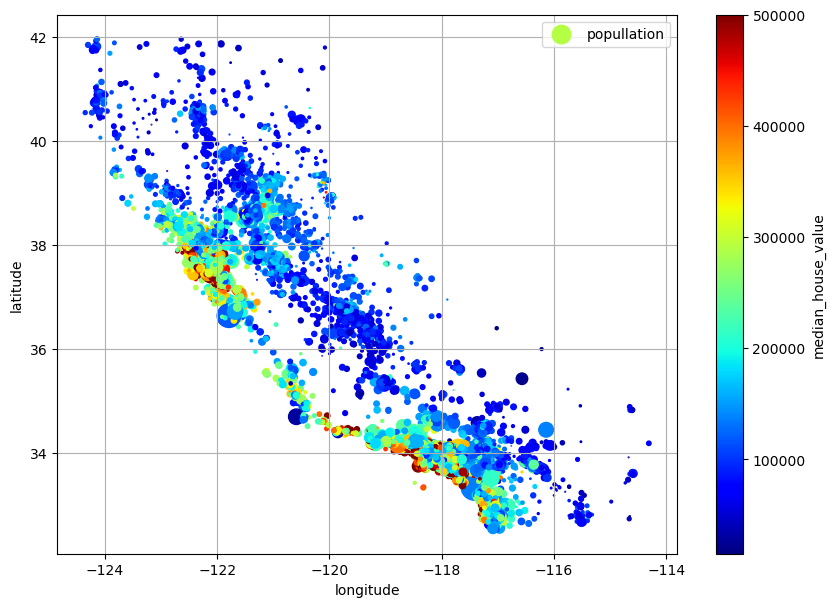

In [13]:
housing.plot(kind="scatter",x="longitude",y="latitude",
             grid=True,s=housing['population']/100,label='popullation',
             c='median_house_value',cmap="jet",colorbar=True,
             legend=True,sharex=False,figsize=(10,7))
plt.savefig("datasets/california_housing_prices_plot.png")

             
plt.show()

# s = market size, c = marker color  , jet = blue to red 

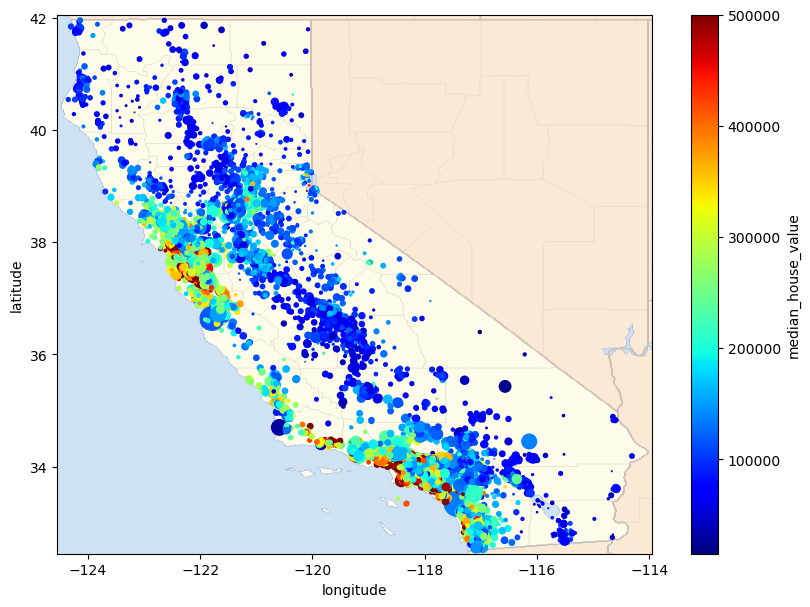

In [14]:
import matplotlib.image as mpimg

# Load California map image
california_img = mpimg.imread("datasets/california.png")

# Create scatter plot
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             s=housing["population"] / 100,
             c="median_house_value",
             cmap="jet",
             colorbar=True,
             figsize=(10, 7))

# Overlay the map image
axis = [-124.55, -113.95, 32.45, 42.05]
plt.axis(axis)
plt.imshow(california_img, extent=axis, alpha=0.5)

# Show plot
plt.show()


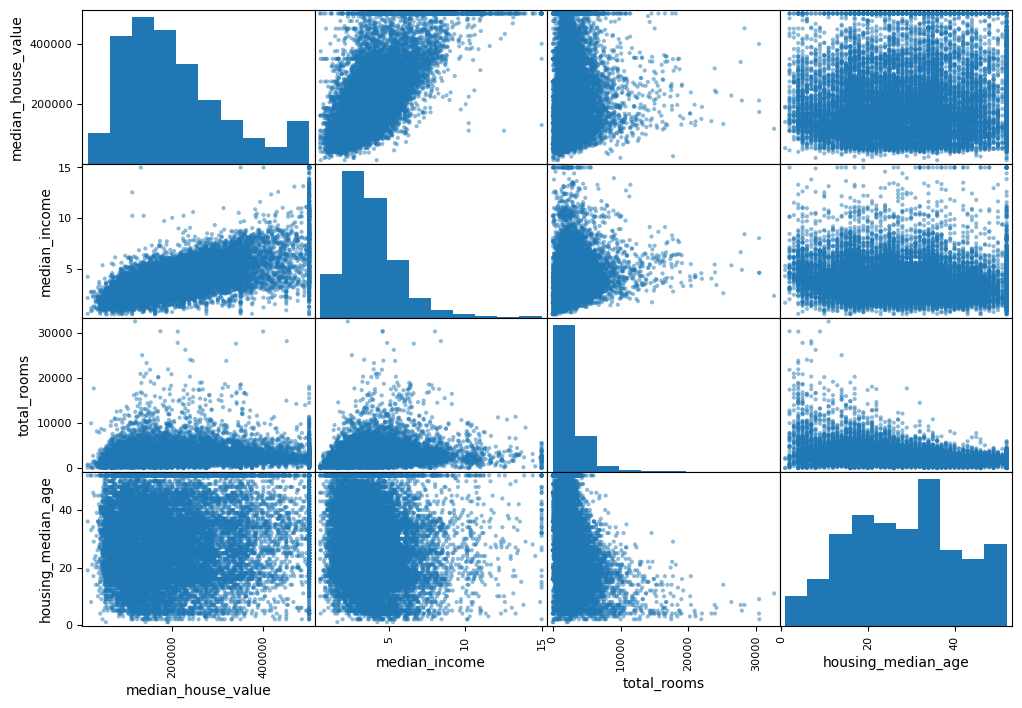

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

### Prepare the Data for Machine Learning Algorithms

In [16]:
housing_labels = housing['median_house_value']
housing = housing.drop(['median_house_value'],axis=1)

In [17]:
# # data cleanig
# You can accomplish these easily using the Pandas DataFrame’s dropna(),
# drop(), and fillna() methods:
# housing.dropna(subset=["total_bedrooms"], inplace=True)
# housing.drop("total_bedrooms", axis=1)
# # option 1
# # option 2
# median = housing["total_bedrooms"].median() # option 3
# housing["total_bedrooms"].fillna(median, inplace=True)

In [18]:
# implementing option 3 with Simple Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')


In [19]:
# Since the median can only be computed on numerical attributes, you then
# need to create a copy of the data with only the numerical attributes (this will
# exclude the text attribute ocean_proximity):
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [20]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2129.    ,  437.    , 1169.    ,
        411.    ,    3.5246])

In [21]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2129.    ,  437.    , 1169.    ,
        411.    ,    3.5246])

In [22]:
X = imputer.transform(housing_num)

In [23]:
housing_cat  = housing[["ocean_proximity"]]

In [24]:
housing_cat

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR BAY
14265,<1H OCEAN
2271,INLAND
...,...
11284,NEAR BAY
11964,<1H OCEAN
5390,INLAND
860,INLAND


In [25]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [26]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [27]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [28]:
from sklearn.preprocessing import StandardScaler
stdr = StandardScaler()
stdr.fit_transform(housing_num)

array([[ 1.17299302, -1.35041487,  0.42853749, ...,  1.0810111 ,
         1.50750741,  0.37969797],
       [ 1.26802809, -1.37853628, -1.47350948, ..., -0.64384214,
        -0.87870693,  0.42006824],
       [-1.3529389 ,  0.98834939, -0.04697426, ...,  1.36319568,
         2.5938282 , -0.09231969],
       ...,
       [ 0.11760365,  0.30406165, -0.99799774, ..., -0.30962978,
         0.0520485 , -0.91152173],
       [ 1.18799856, -0.72705686, -0.522486  , ...,  0.12246535,
        -0.01650573, -0.63438241],
       [ 0.35269038, -0.66144022, -0.522486  , ..., -0.66588782,
        -0.80487931,  1.26207687]])

### Feature Scaling and Transformation

In [31]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [32]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

In [37]:
from sklearn.linear_model import LinearRegression
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5] # pretend this is new
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [38]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(),
transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [43]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self,n_clusters=10,gamma=1.0,random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self # always return self!
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [44]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
sample_weight=housing_labels)

In [45]:
similarities[:3].round(2)

array([[0.  , 0.22, 0.  , 0.93, 0.  , 0.  , 0.  , 0.  , 0.05, 0.  ],
       [0.  , 0.15, 0.  , 0.93, 0.  , 0.  , 0.  , 0.  , 0.03, 0.  ],
       [0.72, 0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.98, 0.  , 0.  ]])

### Transformation Pipelines

In [46]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [47]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
StandardScaler())

In [50]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]

cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])


In [51]:
housing_prepared = preprocessing.fit_transform(housing)

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

# Create the pipeline: preprocessing + Random Forest
forest_reg = make_pipeline(
    preprocessing,
    RandomForestRegressor(random_state=42)
)

# Perform cross-validation and get RMSE scores
forest_rmses = -cross_val_score(
    forest_reg,
    housing,             # your feature matrix
    housing_labels,      # your target vector
    scoring="neg_root_mean_squared_error",
    cv=10
)


In [62]:
r2_scores = cross_val_score(
    forest_reg,
    housing,
    housing_labels,
    scoring="r2",
    cv=10
)

print("R2 scores:", r2_scores)
print("Mean R2:", r2_scores.mean())
print("Standard deviation:", r2_scores.std())


R2 scores: [0.82881102 0.81371653 0.81949192 0.83638793 0.80912829 0.82327886
 0.81582903 0.81891506 0.80821913 0.81793131]
Mean R2: 0.8191709083746146
Standard deviation: 0.008183226176290123
